# ARIMA-SARIMA Forecast 

- Yahoo Stock

### Step 1: Import necessary libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import warnings
# warnings.filterwarnings("ignore")

### Step 2: Load and prepare the dataset

In [24]:
data = pd.read_csv('yahoo_stock.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
stock_data = data['Close']

### Step 3: Split the data into training and testing sets

In [25]:
train_size

1460

In [26]:
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

In [27]:
len(stock_data)

1825

In [28]:
int(len(stock_data) * 0.8)

1460

### Step 4: Train the ARIMA model

In [29]:
p, d, q = 1, 1, 1
model_arima = ARIMA(train, order=(p, d, q))
results_arima = model_arima.fit()

### Step 5: Forecast using the ARIMA model

In [30]:
forecast_arima = results_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

### Step 6: Train the SARIMA model

In [32]:
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12
model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results_sarima = model_sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38324D+00    |proj g|=  5.33766D-02


 This problem is unconstrained.



At iterate    5    f=  4.33651D+00    |proj g|=  2.90937D-02

At iterate   10    f=  4.24844D+00    |proj g|=  7.12940D-04

At iterate   15    f=  4.24844D+00    |proj g|=  7.91588D-04

At iterate   20    f=  4.24844D+00    |proj g|=  6.02016D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   6.020D-06   4.248D+00
  F =   4.2484389027733789     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


### Step 7: Forecast using the SARIMA model

In [33]:
forecast_sarima = results_sarima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

### Step 8: Plot the ARIMA and SARIMA forecasts

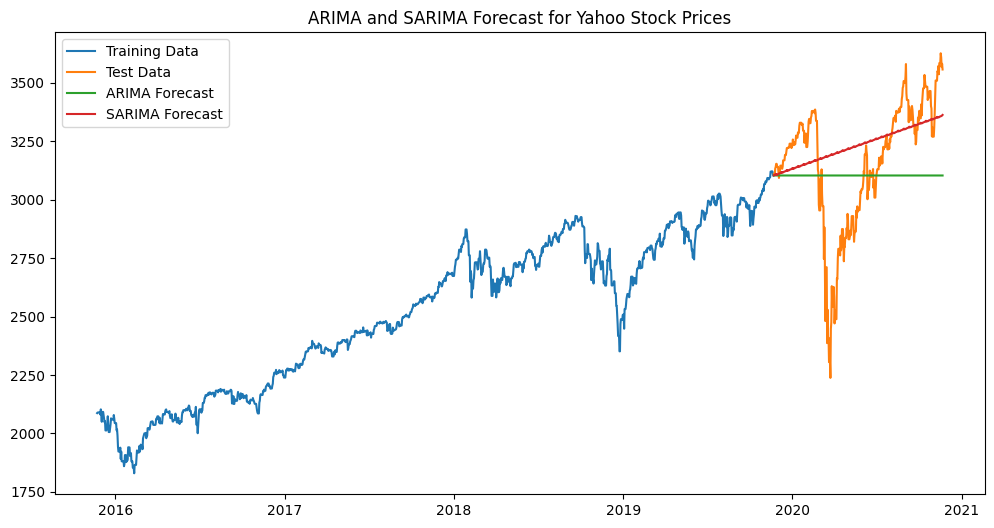

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('ARIMA and SARIMA Forecast for Yahoo Stock Prices')
plt.legend()
plt.show()